## Projeto_Rossmann

## 0.0. Imports

In [1]:
#!pip install inflection
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import datetime
import math
import matplotlib.pyplot as plt 
from IPython.core.display import HTML
from IPython.display import Image

### 0.1. Helper functions

### 0.2. Loading data

In [2]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

## 1.0 Passo 1: Descrição dos dados 

In [3]:
df1 = df_raw.copy()

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 1.1 Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# rename
df1_columns = cols_new

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 1.2 Data Dimensions

In [7]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Rows {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Rows 18


### 1.3  Data Types

In [9]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
date                         datetime64[ns]
dtype: object

### 1.4 Check NA

In [10]:
df1.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
date                              0
dtype: int64

### 1.5 Fillout NA

In [11]:
# Método - lógica de negócio
df1['CompetitionDistance'].max()

75860.0

In [12]:
# para ver uma linha aleatória
df1.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,date
181226,597,4,2015-02-19,5200,716,1,1,0,0,a,a,150.0,9.0,2008.0,1,1.0,2012.0,"Mar,Jun,Sept,Dec",2015-02-19


In [13]:
#math.isnan (para saber os NA)
#CompetitionDistance - distância do competidor mais próximo
# colocando a distância maior do que a distância máxima (para dizer que não tem competidor próximo)
df1['CompetitionDistance'] = df1['CompetitionDistance'].apply (lambda x: 200000.0 if math.isnan(x) else x)

#CompetitionOpenSinceMonth: Mês e ano de abertura de loja competidora mais próxima   
# Se em determinada linha for NA  copia a data daquela linha, data de venda (extrai o mês)
df1['CompetitionOpenSinceMonth'] = df1.apply(lambda x: x['date'].month if math.isnan(x['CompetitionOpenSinceMonth'])else x['CompetitionOpenSinceMonth'], axis=1)

#CompetitionOpenSinceYear     
df1['CompetitionOpenSinceYear'] = df1.apply(lambda x: x['date'].year if math.isnan(x['CompetitionOpenSinceYear'])else x['CompetitionOpenSinceYear'], axis=1)

#Promo2SinceWeek (descreve o ano e a semana que a loja participou da promo 2 (zero não está participando, 1 está participando)
# substitui o NA pela data da linha
df1['Promo2SinceWeek'] = df1.apply(lambda x: x['date'].week if math.isnan(x['Promo2SinceWeek'])else x['Promo2SinceWeek'], axis=1)

#Promo2SinceYear  
df1['Promo2SinceYear'] = df1.apply(lambda x: x['date'].year if math.isnan(x['Promo2SinceYear'])else x['Promo2SinceYear'], axis=1)

#PromoInterval (descreve quais são os intervalos em que a promo 2 começou, nomeando os meses)  
# criando uma coluna auxiliar: PromoInterval
# Substitui o 1 por janeiro...
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

#SE for NA substitui por zero
df1['PromoInterval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)  ## coluna por mês

## Condições: Promointerval
# Promointerval: split para uma lista: se month_map retornar 1 significa que participou da promoção estendida, senão resulta zero 
# utiliza axis = 1 para especificar a coluna (temos mais de uma)
# Cria a coluna is_promo
df1['is_promo'] = df1[['PromoInterval', 'month_map']].apply(lambda x: 0 if x['PromoInterval'] == 0 else 1 if x['month_map'] in x['PromoInterval'].split(',') else 0, axis=1)

In [14]:
df1.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


### 1.6 Change Types

In [15]:
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
date                         datetime64[ns]
month_map                            object
is_promo                              int64
dtype: object

In [17]:

df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].astype(int)
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].astype(int)

df1['Promo2SinceWeek'] = df1['Promo2SinceWeek'].astype(int)
df1['Promo2SinceYear'] = df1['Promo2SinceYear'].astype(int)


### 1.7. Descriptive Statistical

In [18]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.7.1 Numeric Attributes

In [19]:
# Central Tnedency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion (quão próximo ou longe da média): std, min, max, range, skew, kurtosis 
# skew (deformação em relação a curva normal)
# kusrtosis (concentração de dados)
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2,d1, d5, d6]).T.reset_index()
m

# Rename columns
m.columns = ['atributtes', 'min', 'max', 'range','mean', 'median','std','skew','kurtosis']

In [20]:
m

,atributtes,min,max,range,mean,median,std,skew,kurtosis
0,Store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,DayOfWeek,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,Sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,Customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,Open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,Promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,SchoolHoliday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,CompetitionDistance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,Promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.154080,0.0,0.361026,1.916318,1.672276


C:\Users\deeww\AppData\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


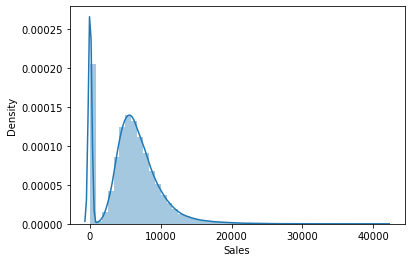

In [21]:
sns.distplot(df1['Sales'])
## Curva próxima da normal (media e mediana parecidas), como  akurtosis é posítiva, existe um deslocamento para a esquerda

C:\Users\deeww\AppData\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


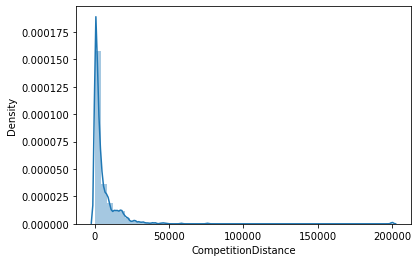

In [22]:
sns.distplot(df1['CompetitionDistance'])
# Curva com um pico muito alto - poison: distância entre os competidores próxima do zero (alta concentração - kurtosis muito positiva)

C:\Users\deeww\AppData\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


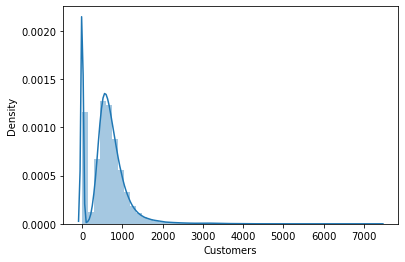

In [23]:
sns.distplot(df1['Customers'])
# Pessoas circulando na loja

### 1.7.2 Categorical attributes

In [24]:
cat_attributes.apply(lambda x: x.unique().shape[0])

StateHoliday                  4
StoreType                     4
Assortment                    3
CompetitionOpenSinceMonth    12
CompetitionOpenSinceYear     23
Promo2SinceWeek              52
Promo2SinceYear               7
PromoInterval                 4
month_map                    12
dtype: int64

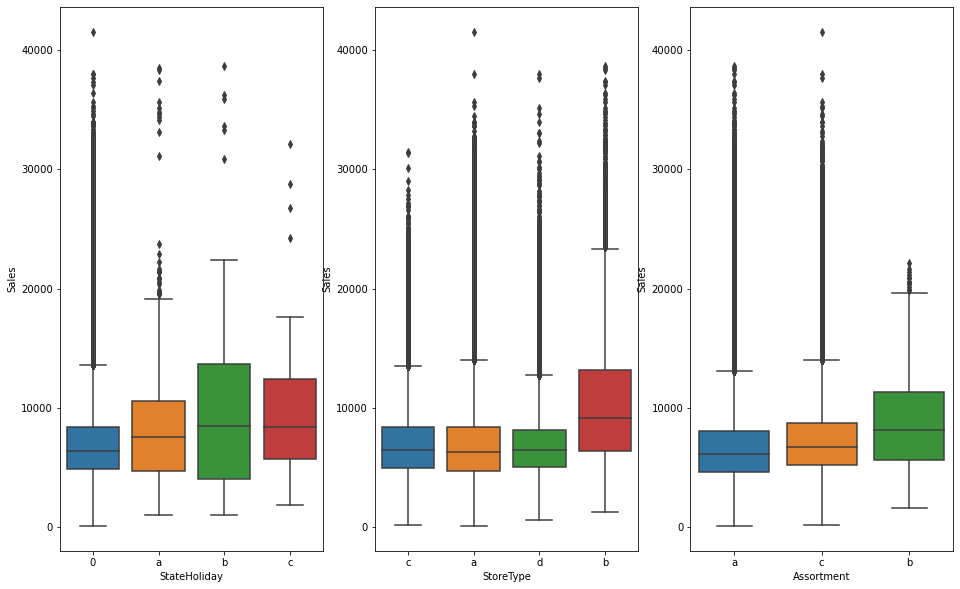

In [25]:
aux1 = df1[(df1['StateHoliday']!= 0) & (df1['Sales']>0)] # Retira as vendas = zero (loja estava fechada)

plt.figure(figsize =(16,10))
plt.subplot(1,3,1)
sns.boxplot( x='StateHoliday', y='Sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot( x='StoreType', y='Sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot( x='Assortment', y='Sales', data=aux1)

In [ ]:
### outlier é 3x o valor do desvio-padrão
### StateHoliday: Feriado 
# O feriado b está em equilíbrio nos quartis, o feriado c apresenta uma alta nas vendas acima da mediana
# Storetype: tipo de loja - a loja b possui vendas acima da média e também tem muito mais outliers, na c a mediana é alta, mas tem uma concentração próxima da mediana
# Assortment (sortimento/variedade): maior parte dos mix de produtos estão no mix b. a e c tem mais outliers

### 2.0 Passo 2: Feature Engineering

In [26]:
# Cópia do DataFrame
df2 = df1.copy()

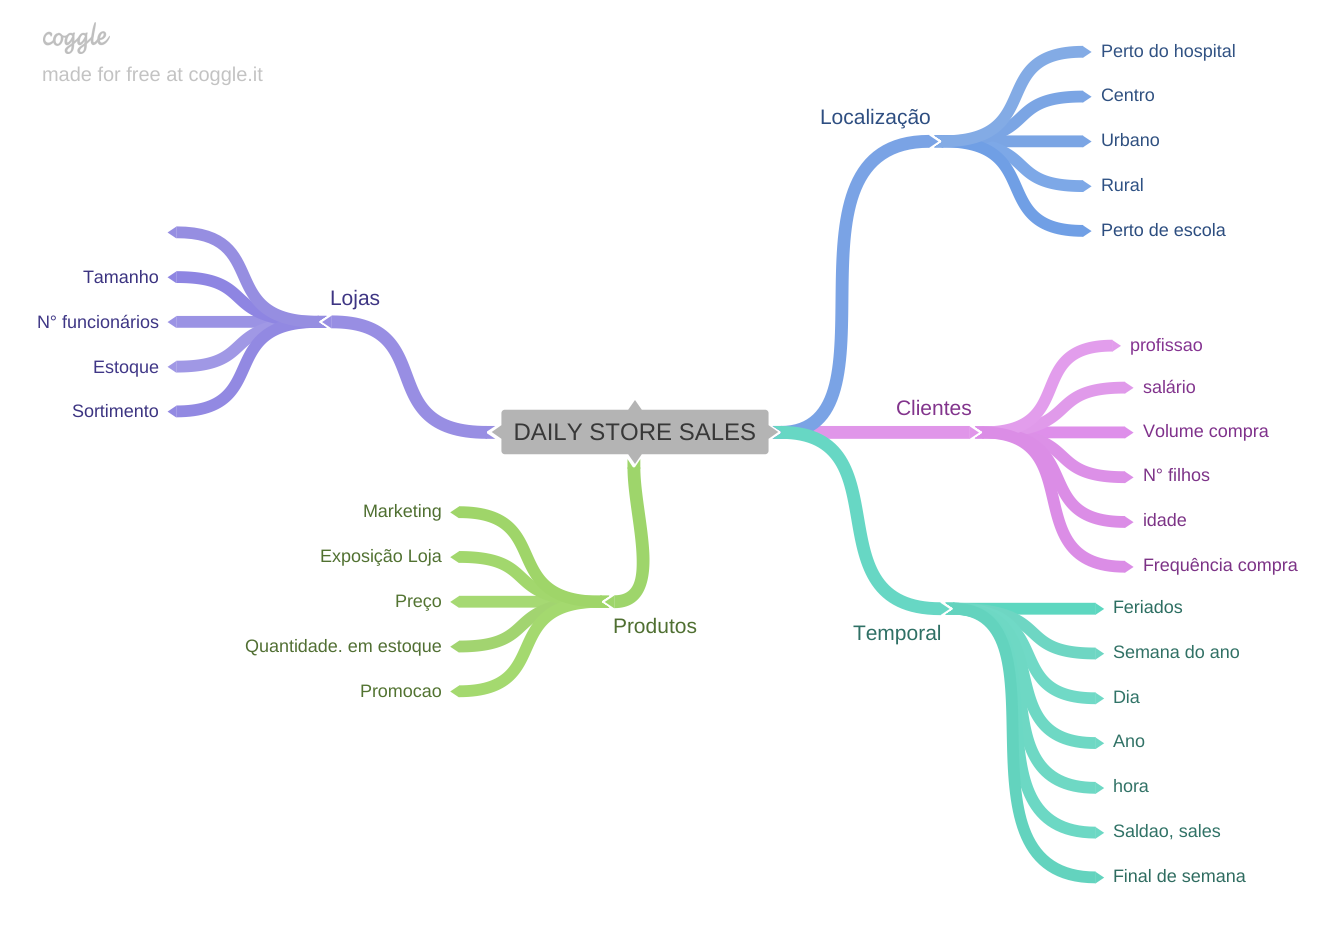

In [27]:
Image('img/MindMap_hipoteses.png')

### 2.1 Criação de Hipóteses

#### 2.1.1 Hipóteses relacionadas às lojas

**1.** Lojas com quadro de funcionários maior deveriam vender mais

**2.** Lojas com estoque maior deveriam vender mais

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com sortimento maior deveriam vender mais

**5.** Lojas com competidores mais próximos deveriam vender menos

**6.** Lojas com competidores há mais tempo deveriam vender mais


#### 2.1.2 Hipóteses relacionadas aos Produtos

**1.** Lojas que investem mais em marketing deveriam vender mais

**2.** Lojas que expoem mais os produtos na vitrine deveriam vender mais

**3.** Lojas que tem preços menores nos produtos deveriam vender mais

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender menos

**5.** Lojas com promoções mais agressivas (descontos maiores) deveriam vender mais

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais

**7.** Lojas com mais dias de promoção deveriam vender mais

**8.** Lojas mais promoções consecutivas deveriam vender mais

#### 2.1.3 Hipóteses relacionadas ao tempo

**1.** Lojas abertas durante o feriado de natal deveriam vender mais

**2.** Lojas deveriam vender mais ao longo dos anos

**3.** Lojas deveriam vender mais no segundo semestre do ano

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês

**5.** Lojas deveriam vender menos nos finais de semana

**6.** Lojas deveriam vender menos durante os feriados escolares



### 2.2 Lista final de Hipóteses (Priorização)

**1.** Lojas com sortimento maior deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores há mais tempo deveriam vender mais


**4.** Lojas com promoções ativas por mais tempo deveriam vender mais

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas mais promoções consecutivas deveriam vender mais


**7.** Lojas abertas durante o feriado de natal deveriam vender mais

**8.** Lojas deveriam vender mais ao longo dos anos

**9.** Lojas deveriam vender mais no segundo semestre do ano

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês

**11.** Lojas deveriam vender menos nos finais de semana

**12.** Lojas deveriam vender menos durante os feriados escolares

### 2.3 Featire engineering

In [28]:
df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'date', 'month_map', 'is_promo'],
      dtype='object')

In [29]:
df2.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
date                         datetime64[ns]
month_map                            object
is_promo                              int64
dtype: object

In [30]:
df2.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
date                         0
month_map                    0
is_promo                     0
dtype: int64

In [38]:
## Derivando features da data: novas colunas ###

# year
df2['Month'] = df2['Date'].dt.month

# month
df2['Day'] = df2['Date'].dt.day

# week of year
df2['week_of_year'] = df2['Date'].dt.weekofyear

# year week
df2['year_week'] = df2['Date'].dt.strftime( '%Y-%W' )

# competition since (Quanto tempo tem desde que a competição começou): granularidade 30 = mês

df2['CompetitionSince'] = df2.apply (lambda x: datetime.datetime( year=x['CompetitionOpenSinceYear'], month=x['CompetitionOpenSinceMonth'], day=1), axis=1)
df2['CompettionTimeMonth'] = ((df2['Date'] - df2['CompetitionSince']) /30).apply(lambda x: x.days).astype(int)

# nova coluna: promo since (Quanto tempo tem a promoção): ano e semana, tem que modificar para mês
# Tem que transformar em string para fazer o join; converte para data para poder fazer a subtração
df2['promo_since'] = df2['Promo2SinceYear'].astype(str) + '-' + df2['Promo2SinceWeek'].astype(str)
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
# nova coluna: promo_time_week: tempo que a promoção está ativa em semanas
df2['promo_time_week'] = ((df2['Date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment: trocando os níveis a, b, c por basic, extra, extended
df2['Assortment'] = df2['Assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday: trocando a,b,c por Tipos de feriados: Public holiday, Easter holiday, Christmas
df2['StateHoliday'] = df2['StateHoliday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas')

<ipython-input-38-1052dcf51413>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['Date'].dt.weekofyear


In [33]:
df2.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a
